# EDA

#### Exploratory Data Analysis

- It is the process to know more about the data.
- It is exploring the data.
- It is the process to have a look upon the data from different angles and perspectives.
- It is the process to understand the different aspects of the data. 

# Steps involved in EDA:

- Check the Shape of the dataframe.
- Check the basic information(datatypes) of the various columns in the dataframe to get to know about the numeric and     object columns that we have in the dataframe.
- Check the column names in the dataframe and drop the columns which is not required or used for data analysis.
- See the statistical summary of the dataframe variables/columns.
- Check for the duplicate rows in the dataframe.
- Check for the null values in all the columns of the dataframe.
- Check for the outliers in the all columns of the dataframe.
- Treat the duplicate rows in the dataframe.
- Treat the columns that have null values in the dataframe.
- Treat the columns that have outliers in the dataframe.
- Check for correlation b/w the variables/columns of the dataframe.
- Analyze the dataframe using visualization tools.


# Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset

In [2]:
dt=pd.read_csv("Bengaluru_House_Data.csv")

In [3]:
dt.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


# Shape

In [4]:
dt.shape

(13320, 9)

In [5]:
# - We have 13320 rows and 9 columns

# Columns

In [6]:
dt.columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft', 'bath', 'balcony', 'price'],
      dtype='object')

# Basic Information

In [7]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [8]:
# - Object columns- 6
# - Numeric columns- 3

# Statistical summary

In [9]:
dt.describe().style.background_gradient(cmap='Reds',low=0.5,high=1.0,axis=1)

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


# Check for the null values

In [10]:
dt.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5502
total_sqft         0
bath              73
balcony          609
price              0
dtype: int64

- Location, size, society, bath, balcony columns have the null values

# Check for the duplicate values

In [11]:
dt.duplicated().sum()

529

In [12]:
dt[dt.duplicated()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
971,Super built-up Area,Ready To Move,Haralur Road,3 BHK,NRowse,1464,3.0,2.0,56.0
1115,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
1143,Super built-up Area,Ready To Move,Vittasandra,2 BHK,Prlla C,1246,2.0,1.0,64.5
1290,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1194,2.0,2.0,47.0
1394,Super built-up Area,Ready To Move,Haralur Road,2 BHK,NaN,1027,2.0,2.0,44.0
...,...,...,...,...,...,...,...,...,...
13285,Super built-up Area,Ready To Move,VHBCS Layout,2 BHK,OlarkLa,1353,2.0,2.0,110.0
13299,Super built-up Area,18-Dec,Whitefield,4 BHK,Prtates,2830 - 2882,5.0,0.0,154.5
13311,Plot Area,Ready To Move,Ramamurthy Nagar,7 Bedroom,NaN,1500,9.0,2.0,250.0
13313,Super built-up Area,Ready To Move,Uttarahalli,3 BHK,Aklia R,1345,2.0,1.0,57.0


- We have 529 rows as duplicate rows.

# Dropping the duplicates

In [13]:
dt.drop_duplicates(inplace=True)

In [14]:
dt.duplicated().sum()

0

- We have successfully removed the duplicate rows from the dataframe 'dt'.

In [15]:
dt.shape 

(12791, 9)

In [16]:
#After removing the duplicates rows from the the dataframe 'dt' we have 12791 rows and 9 columns.

# Treating the null values

- 1- We can drop the null values
- 2- We can impute the null values (filling the null values with some other values)
- Before filling the null values we have to check whether a column is discrete or cataegorical

In [17]:
dt.isna().sum()

area_type          0
availability       0
location           1
size              16
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [18]:
dt.nunique()

area_type          4
availability      81
location        1305
size              31
society         2688
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [19]:
# As a thumb rule object column having a very small number of unique values
# Object column in the dataframe will be treated as categorical.
# Numerical column maybe discrete or categorical.

In [20]:
# If the column is categorical then we generally fill the null values with the mode value.
# If the column is discrete then we generally fill the null values with mean or median.

# Location column

In [21]:
# "location" column has 1305 unique values and the number of rows in the dataframe is 12791. Since 'location' is of object 
# type, we consider it as categorical. Therefore all the NA/null values in "location" column are replaced by the mode. 
# The 'location' is categorical
# because we can group houses based on 'location'.

dt.location.dtype

dtype('O')

In [22]:
dt.location.fillna(dt.location.mode()[0],inplace=True)

In [23]:
dt.location.isna().sum()

0

In [24]:
dt.location.mode()[0]

'Whitefield'

# Size

In [25]:
# 'size' column has 31 unique values. Since 'size' is of object type, so we consider it as categorical.
# Therefore we replace the NA/null values in 'size' column by the mode value.
dt['size'].dtype

dtype('O')

In [26]:
# Mode

In [27]:
x=dt['size'].mode()
print(x,type(x))
print(x[0])

0    2 BHK
Name: size, dtype: object <class 'pandas.core.series.Series'>
2 BHK


In [28]:
dt['size'].fillna(dt['size'].mode()[0],inplace=True)

In [29]:
dt.isna().sum()

area_type          0
availability       0
location           0
size               0
society         5328
total_sqft         0
bath              73
balcony          605
price              0
dtype: int64

In [30]:
# Note: 'size' is the column name in the dataframe 'dt', size is also an attribute of the DataFrame object.

In [31]:
dt.size

115119

# Society

- If any column has more than 30% values as null values, we drop that column.

In [32]:
dt.society.isna().sum()*100/len(dt)

41.654288171370496

In [33]:
# Since 41% values are null values so we can drop the 'society' column.

In [34]:
dt.drop('society',axis=1,inplace=True)

In [35]:
dt.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200,2.0,1.0,51.00


In [36]:
dt.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath             73
balcony         605
price             0
dtype: int64

# bath

In [37]:
# 'bath' is numeric column. Since 'bath' is of object type, it is considered as categorical. 
# Therefore we will fill the NA/null values in 'bath' column by the mode.

dt.bath.dtype

dtype('float64')

In [38]:
dt.nunique()

area_type          4
availability      81
location        1305
size              31
total_sqft      2117
bath              19
balcony            4
price           1994
dtype: int64

In [39]:
dt.bath.fillna(dt.bath.mode()[0],inplace=True)

In [40]:
dt.isna().sum()

area_type         0
availability      0
location          0
size              0
total_sqft        0
bath              0
balcony         605
price             0
dtype: int64

# balcony

In [41]:
# 'balcony' is numeric column. Since 'balcony' is of object type, it is consider it as categorical. 
# Therefore the NA/null values in "balcony" column are filled by the mode value.

dt.balcony.dtype

dtype('float64')

In [42]:
dt.balcony.fillna(dt.balcony.mode()[0],inplace=True)

In [43]:
dt.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

- We have successfully treated the null values.

In [44]:
# Outliers' Detection
# Outliers' Removal
# Analysis
# Data Transformation

# Outliers Detection

# Outlier :

- A few data points those are significantly different from rest of the data points.
- If any data point is far from the mean value can be treated as an outlier.

In [45]:
# To detect outliers we use boxplot

# Price

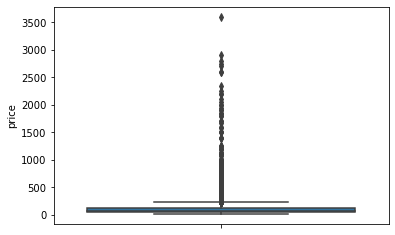

In [46]:
sns.boxplot(y='price',data=dt)

plt.show()

In [47]:
dt.price.describe()

count    12791.000000
mean       114.317646
std        151.480310
min          8.000000
25%         50.000000
50%         73.000000
75%        121.000000
max       3600.000000
Name: price, dtype: float64

# Total sqft

In [49]:
dt.total_sqft.describe()

count     12791
unique     2117
top        1200
freq        808
Name: total_sqft, dtype: object

In [50]:
dt.total_sqft.dtype

dtype('O')

In [51]:
dt.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [52]:
# series.str returns a String Method object which we can use to apply the string function on each value in the series.
dt.total_sqft.str

In [53]:
dt.total_sqft.str.contains(' - ')

0        False
1        False
2        False
3        False
4        False
         ...  
13314    False
13315    False
13316    False
13317    False
13318    False
Name: total_sqft, Length: 12791, dtype: bool

In [54]:
# Here we store the indexes of the rows in dataframe 'dt' where the value for 'total_sqft' contains ' - ' 
# as a boolean series.

ind=dt[dt.total_sqft.str.contains('-')].index
ind

Int64Index([   30,    56,    81,   122,   137,   165,   188,   224,   549,
              579,
            ...
            12435, 12544, 12791, 12861, 12955, 12975, 12990, 13059, 13240,
            13265],
           dtype='int64', length=200)

In [55]:
# So 200 values are there in 'total_sqft' where the values contain ' - ' 
# Since a range has been given rather than the exact value for 'total_sqft', so these values are replaced by the 
# average value.
dt.total_sqft.str.contains(' - ').sum()

200

In [56]:
x1 = dt[dt.total_sqft.str.contains(' - ')]
x1

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2100 - 2850,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3010 - 3410,2.0,2.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,2957 - 3450,2.0,2.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,3067 - 8156,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,850 - 1060,2.0,0.0,38.190
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,1804 - 2273,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1200 - 1470,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1020 - 1130,2.0,2.0,52.570


In [57]:
# Here we find those rows from the dataframe 'dt' that contain ' - ' in the value corresponding to 'total_sqft' column 
# and then fetch the series 'total_sqft' from it and then we split this series values with '-' as the delimiter.

s=dt[dt.total_sqft.str.contains('-')]['total_sqft'].str.split('-')

In [58]:
lst=[]
for i in s:
    lst.append((float(i[0])+float(i[1]))/2)

In [59]:
print(lst)

[2475.0, 3210.0, 3203.5, 5611.5, 1073.5, 1242.5, 1277.5, 1630.0, 1317.5, 1800.0, 1132.5, 5520.0, 4046.0, 5600.0, 1177.5, 4624.5, 1122.5, 582.5, 1142.5, 4348.5, 657.5, 649.5, 1450.0, 1000.0, 971.5, 1662.0, 687.325, 615.0, 3430.0, 2038.5, 3715.0, 665.0, 4624.5, 776.5, 2817.5, 3817.0, 3461.0, 1277.5, 825.0, 1128.76, 3715.0, 1104.0, 790.5, 3035.0, 3181.0, 3539.5, 2856.0, 700.0, 1559.0, 1352.5, 1800.0, 1950.0, 1185.5, 1005.0, 1707.0, 1476.0, 3181.0, 1192.5, 2912.5, 630.5, 1530.0, 717.0, 1664.0, 3185.0, 4303.5, 1343.5, 3416.5, 1312.5, 1137.5, 458.0, 2345.0, 709.0, 605.0, 2094.0, 2987.5, 2072.5, 1089.0, 1625.0, 2661.0, 680.0, 412.5, 3752.5, 805.5, 709.0, 1462.5, 1891.0, 1617.5, 1302.5, 975.0, 2585.5, 630.5, 2648.0, 614.5, 4334.0, 2336.5, 1302.5, 3317.5, 1405.0, 1532.5, 3550.0, 2856.0, 2856.0, 1583.0, 1115.0, 1162.5, 1580.0, 1272.5, 925.0, 2856.0, 698.5, 1730.0, 1431.5, 4062.5, 1029.5, 2195.0, 1495.0, 778.0, 1155.0, 3496.5, 1700.0, 1522.5, 784.0, 3385.5, 777.0, 2464.5, 640.0, 1773.5, 3854.5, 3

In [60]:
ind

Int64Index([   30,    56,    81,   122,   137,   165,   188,   224,   549,
              579,
            ...
            12435, 12544, 12791, 12861, 12955, 12975, 12990, 13059, 13240,
            13265],
           dtype='int64', length=200)

In [61]:
# Replacing the values in 'total_sqft' which contains ' - ' with the corresponding value in lst.

dt.loc[ind,'total_sqft']=lst

In [62]:
dt.loc[ind]

,area_type,availability,location,size,total_sqft,bath,balcony,price
30,Super built-up Area,19-Dec,Yelahanka,4 BHK,2475.0,4.0,0.0,186.000
56,Built-up Area,20-Feb,Devanahalli,4 Bedroom,3210.0,2.0,2.0,192.000
81,Built-up Area,18-Oct,Hennur Road,4 Bedroom,3203.5,2.0,2.0,224.500
122,Super built-up Area,18-Mar,Hebbal,4 BHK,5611.5,4.0,0.0,477.000
137,Super built-up Area,19-Mar,8th Phase JP Nagar,2 BHK,1073.5,2.0,0.0,54.005
...,...,...,...,...,...,...,...,...
12975,Super built-up Area,20-Aug,Whitefield,2 BHK,955.0,2.0,0.0,38.190
12990,Super built-up Area,18-May,Talaghattapura,3 BHK,2038.5,3.0,0.0,122.000
13059,Super built-up Area,Ready To Move,Harlur,2 BHK,1335.0,2.0,0.0,72.760
13240,Super built-up Area,Ready To Move,Devanahalli,1 BHK,1075.0,2.0,2.0,52.570


In [63]:
# All the values from the 'total_sqft column containing ' - ' have been replaced by the average of the lower and the upper
# limit.

dt.total_sqft.str.contains('-').sum()

0

In [64]:
dt.isna().sum()

area_type       0
availability    0
location        0
size            0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

In [65]:
dt.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft       object
bath            float64
balcony         float64
price           float64
dtype: object

In [66]:
dt.total_sqft.replace('[A-Za-z. ]','',regex=True,inplace=True)

In [67]:
dt.total_sqft=dt.total_sqft.astype(float)

In [68]:
dt.dtypes

area_type        object
availability     object
location         object
size             object
total_sqft      float64
bath            float64
balcony         float64
price           float64
dtype: object

- Now we have successfully converted the 'total_sqft' column to float type.


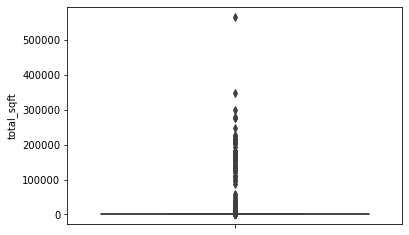

In [69]:
# checking for outliers
sns.boxplot(y='total_sqft',data=dt)

plt.show()

# Outliers Removal

# IQR method

In [70]:
# We cap the values between the upper bound and lower bound

In [71]:
# upper bound= q3 + 1.5*iqr
# lower bound=q1 - 1.5*iqr
# iqr = q3 - q1
# q3 = 75th percentile value
# q1 = 25th percentile value

In [72]:
def outlier(data):
    
    q1=data.quantile(0.25)
    q3=data.quantile(0.75)

    iqr=q3-q1
    upper_bound=q3+1.5*iqr
    lower_bound=q1-1.5*iqr
    
    return data.clip(upper_bound,lower_bound)

In [73]:
dt.total_sqft.describe()

count     12791.000000
mean       2432.812492
std       13186.508638
min           1.000000
25%        1100.000000
50%        1283.000000
75%        1700.000000
max      566584.000000
Name: total_sqft, dtype: float64

In [74]:
# np.where() can be used to cap the values
# np.clip() can be used to cap the values

In [75]:
dt['Total']=outlier(dt.total_sqft)

In [76]:
dt.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0


In [77]:
dt[['total_sqft','Total']].describe()

,total_sqft,Total
count,12791.000000,12791.000000
mean,2432.812492,1444.891415
std,13186.508638,550.576060
min,1.000000,200.000000
25%,1100.000000,1100.000000
50%,1283.000000,1283.000000
75%,1700.000000,1700.000000
max,566584.000000,2600.000000


<AxesSubplot:ylabel='Total'>

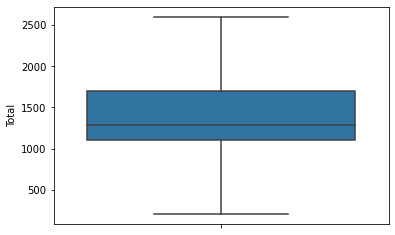

In [78]:
sns.boxplot(y='Total',data=dt)

In [79]:
dt['New_Price']=outlier(dt.price)

In [80]:
dt.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00


In [81]:
# Note: min value for 'price' and 'New_Price' are same because using IQR method the lower_bound for the box plot 
# is showing as -ve which is less than the min value in 'price' 
# Hence the lower bound is same as the min value in 'price'.

dt[['price','New_Price']].describe()

,price,New_Price
count,12791.000000,12791.000000
mean,114.317646,94.570090
std,151.480310,60.646174
min,8.000000,8.000000
25%,50.000000,50.000000
50%,73.000000,73.000000
75%,121.000000,121.000000
max,3600.000000,227.500000


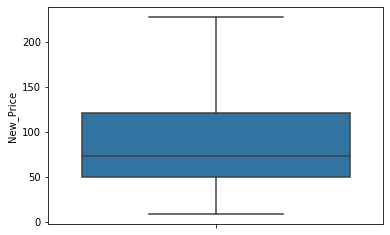

In [82]:
sns.boxplot(y='New_Price',data=dt)
plt.show()

# Analysis:

# Average price according to the area type

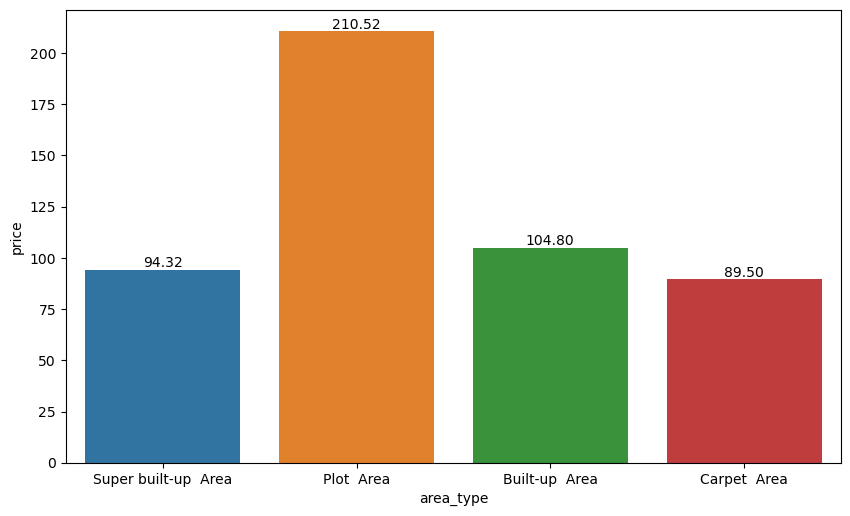

In [83]:
# Here the x-variable is 'price' which is categorical, so by default, the bar-plot will plot the mean of the 'price' values
# in each category.
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='area_type',y='price',data=dt,ci=False)
for i in ax.containers:
    ax.bar_label(i,fmt='%.2f')
    
plt.show()

# Relationship between price and total squareft

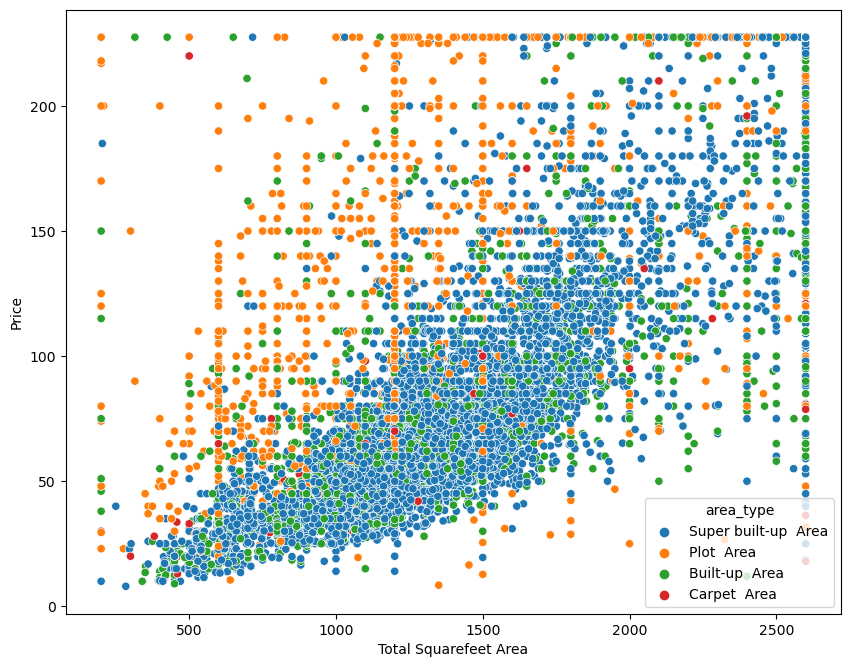

In [84]:
plt.figure(figsize=(10,8),dpi=100)
sns.scatterplot(x='Total',y='New_Price',hue='area_type',data=dt)
plt.xlabel('Total Squarefeet Area')
plt.ylabel('Price')

plt.show()

# Observations according to the area type

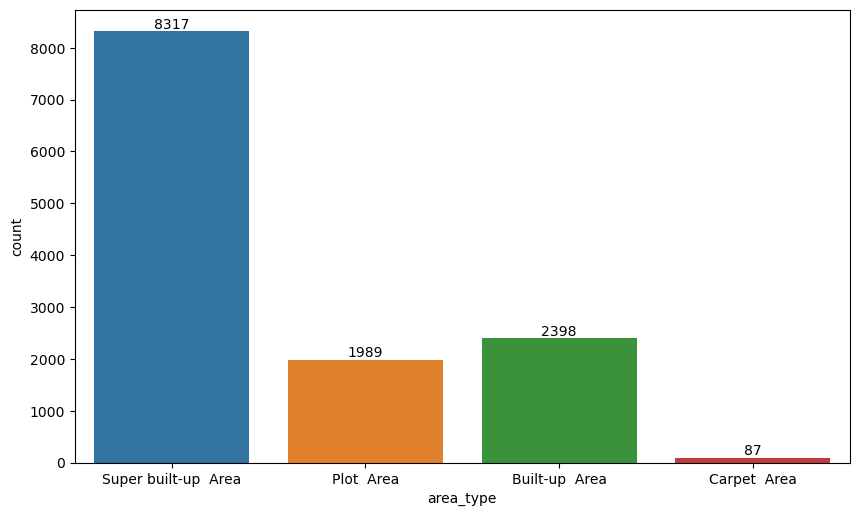

In [85]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.countplot(x='area_type',data=dt)

for i in ax.containers:
    ax.bar_label(i)

# Ratio of the areatype

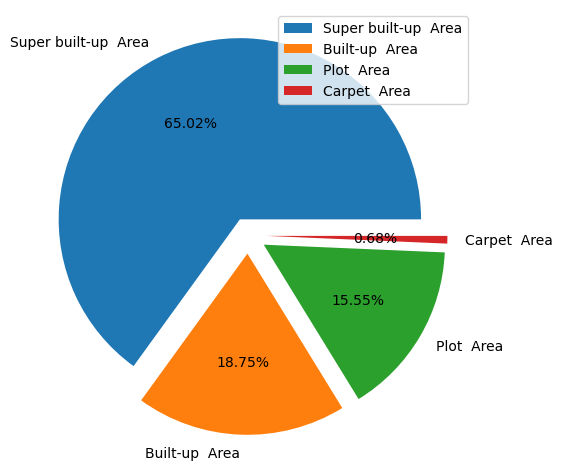

In [86]:
plt.figure(figsize=(10,6),dpi=100)
plt.pie(dt.area_type.value_counts(),labels=dt.area_type.value_counts().index,autopct='%.2f%%',explode=(0.1,0.1,0.1,0.1))
plt.legend()
plt.show()

In [87]:
dt.head()

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,2600.0,5.0,3.0,120.00,2600.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00


# Average price of 2bhk, 3bhk and 4bhk

In [88]:
x=dt[(dt['size']=='2 BHK') | (dt['size']=='3 BHK') | (dt['size']=='4 BHK')]
x

,area_type,availability,location,size,total_sqft,bath,balcony,price,Total,New_Price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,1056.0,2.0,1.0,39.07,1056.0,39.07
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,1440.0,2.0,3.0,62.00,1440.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,1521.0,3.0,1.0,95.00,1521.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,1200.0,2.0,1.0,51.00,1200.0,51.00
5,Super built-up Area,Ready To Move,Whitefield,2 BHK,1170.0,2.0,1.0,38.00,1170.0,38.00
...,...,...,...,...,...,...,...,...,...,...
13312,Super built-up Area,Ready To Move,Bellandur,2 BHK,1262.0,2.0,2.0,47.00,1262.0,47.00
13314,Super built-up Area,Ready To Move,Green Glen Layout,3 BHK,1715.0,3.0,3.0,112.00,1715.0,112.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,3600.0,5.0,2.0,400.00,2600.0,227.50
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,1.0,60.00,1141.0,60.00


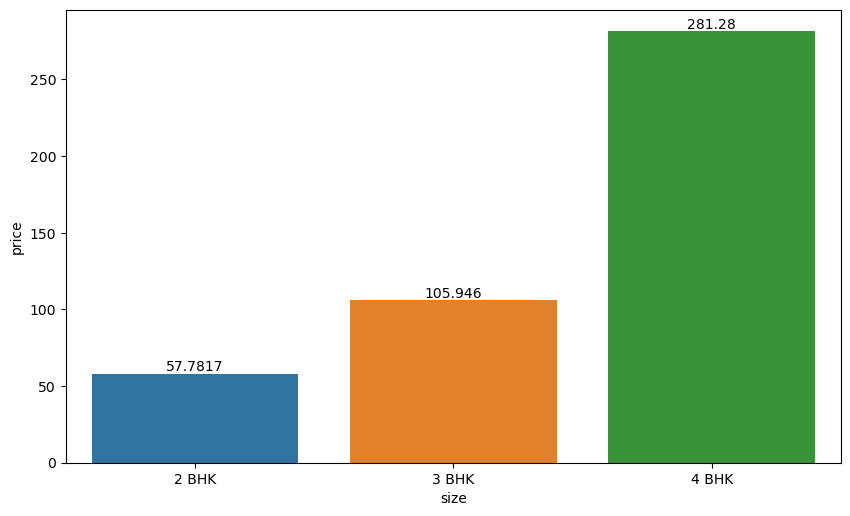

In [89]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='size',y='price',data=x,ci=False)
for i in  ax.containers:
    ax.bar_label(i)
plt.show()

# Maximum price of 2bhk, 3bhk and 4bhk

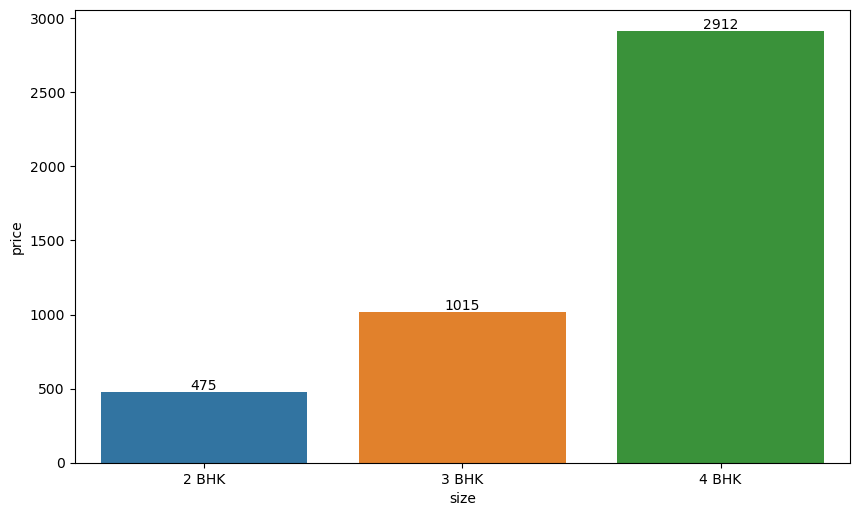

In [90]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='size',y='price',data=x,ci=False,estimator=np.max)
for i in  ax.containers:
    ax.bar_label(i)
plt.show()

# Maximum price of 2bhk, 3bhk and 4bhk

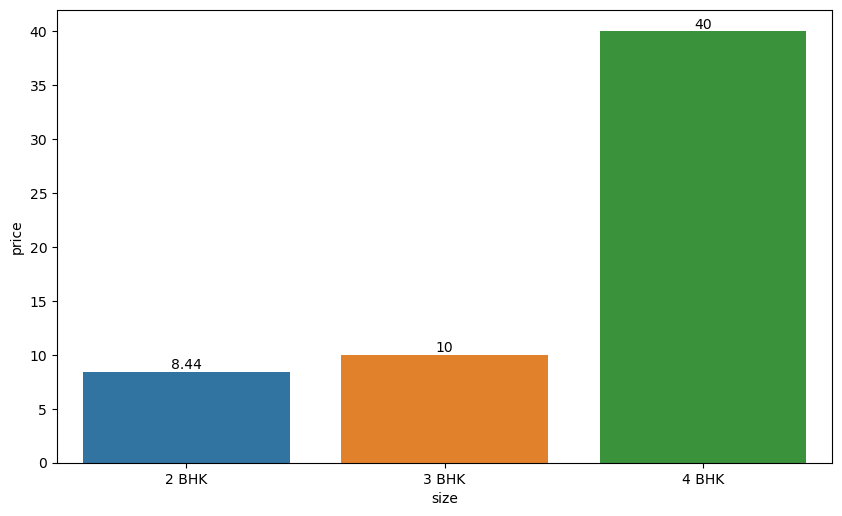

In [91]:
plt.figure(figsize=(10,6),dpi=100)
ax=sns.barplot(x='size',y='price',data=x,ci=False,estimator=np.min)
for i in  ax.containers:
    ax.bar_label(i)
plt.show()

# Coorelation

In [92]:
dt.corr()

,total_sqft,bath,balcony,price,Total,New_Price
total_sqft,1.000000,0.070755,0.024316,0.095530,0.199037,0.096261
bath,0.070755,1.000000,0.204692,0.451203,0.510815,0.611388
balcony,0.024316,0.204692,1.000000,0.123589,0.256743,0.183047
price,0.095530,0.451203,0.123589,1.000000,0.544778,0.686123
Total,0.199037,0.510815,0.256743,0.544778,1.000000,0.741887
New_Price,0.096261,0.611388,0.183047,0.686123,0.741887,1.000000


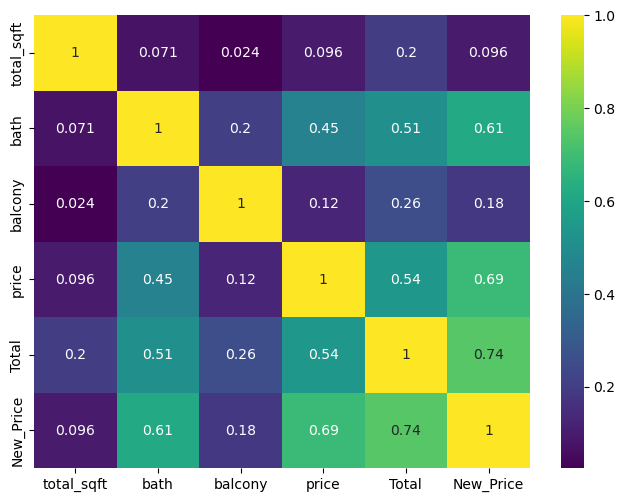

In [93]:
plt.figure(figsize=(8,6),dpi=100)
sns.heatmap(dt.corr(),annot=True,cmap='viridis')
plt.show()